## Observations and Insights 

In [ ]:
# Capomulin and Ramicane appear to be the most effective treatments.  Both regimens produced significant decreases 
# in average tumor volumes at the end of treatment.  

# Weight seems to be a factor in Tumor volume as seen in the scatter plot.  We see that the heavier the weight, 
# the bigger the tumor size is.  A correlation coefficient of 0.84 shows a very strong correlation between the two. 

# Naftisoln, Ketapril, Stelasyn can be eliminated due to the tumor volume increasing in size at the end of treatment.  
# In addition, they all have extremely high variances in their results and produced the same results as the Placebo.  


In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.DataFrame(mouse_metadata)
mouse_df

results_df = pd.DataFrame(study_results)
results_df

merge_df = pd.merge(mouse_df, results_df, on="Mouse ID")


In [78]:
# Checking the number of mice in the DataFrame.
print (len(merge_df))

1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.duplicated(subset = ["Mouse ID","Timepoint"])
merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]                              
                               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
new_merge_df = merge_df[merge_df["Mouse ID"] != "g989"]
len(new_merge_df)

1880

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merge_df.drop_duplicates(subset = ["Mouse ID"], keep = 'last', inplace = False)   

clean_df = new_merge_df.drop_duplicates(subset = ["Mouse ID"], keep = 'last', inplace = False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'] 

var = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

mean= clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stat_table_df = pd.DataFrame({"Mean":mean, "Median": median, "Variance": var, "STD": std, "SEM": sem})
stat_table_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,38.125164,5.715188,1.143038
Ceftamin,57.753977,59.851956,59.851956,8.365568,1.673114
Infubinol,58.178246,60.165180,60.165180,8.602957,1.720591
Ketapril,62.806191,64.487812,64.487812,9.945920,1.989184
Naftisol,61.205757,63.283288,63.283288,10.297083,2.059417
Placebo,60.508414,62.030594,62.030594,8.874672,1.774934
Propriva,56.493884,55.591622,55.591622,8.415626,1.717832
Ramicane,36.191390,36.561652,36.561652,5.671539,1.134308
Stelasyn,61.001707,62.192350,62.192350,9.504293,1.940056


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

function = 'mean', 'median', 'var', 'std', 'sem'

agg_df = clean_df.groupby('Drug Regimen').agg(function)['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [79]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pandas.

barplot = new_merge_df[["Mouse ID", "Drug Regimen"]]
barplot1 = barplot.groupby("Drug Regimen")
barplot2 = barplot1.count()

data = {"Drug Regimen": ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol', 'Placebo','Stelasyn','Ceftamin','Infubinol','Propriva'],
        "Number of Mice": [230,228,188,186,182,181,181,178,178,148]
        };
      
dataFrame = pd.DataFrame(data = data)


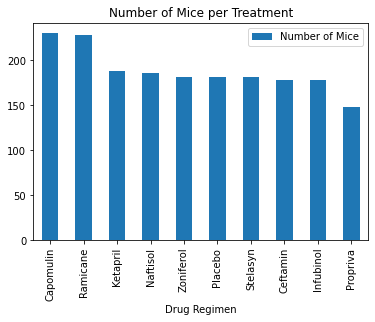

In [80]:
dataFrame.plot.bar(x="Drug Regimen", y="Number of Mice", title="Number of Mice per Treatment");

<function matplotlib.pyplot.show(*args, **kw)>

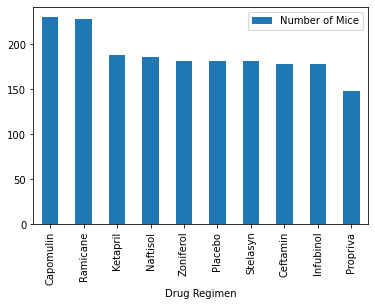

In [69]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pyplot.

barplot = new_merge_df[["Mouse ID", "Drug Regimen"]]
barplot1 = barplot.groupby("Drug Regimen")
barplot2 = barplot1.count()
barplot2=dataFrame.sort_values(by ='Number of Mice', ascending = False)
barplot2 = barplot2.set_index("Drug Regimen")

barplot2.plot(kind="bar")

plt.xlabel = ("Drug Regimen")
plt.ylabel = ("Number of Mice")
plt.title = ("Number of Mice Per Treatment")
plt.show


## Pie Plots

C:\Users\mokae\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


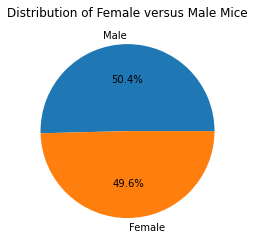

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_df["Sex"]
gender = gender.value_counts()
male = gender["Male"]
female = gender["Female"]

data = {'Gender': [male, female]}
df = pd.DataFrame(data,columns=['Gender'])

my_labels = 'Male','Female'

fig, ax = plt.subplots()
ax.pie(df,labels=my_labels,autopct='%1.1f%%')
ax.set(aspect="equal", title='Distribution of Female versus Male Mice')
plt.show()

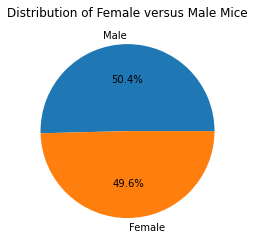

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_data = [male, female]
my_labels = 'Male','Female'

fig1, ax1 = plt.subplots()
ax1.pie(my_data, labels=my_labels, autopct='%1.1f%%')
ax1.set(aspect="equal", title='Distribution of Female versus Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
capomulin1 = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

ramicane = ramicane["Tumor Volume (mm3)"]
capomulin= capomulin1["Tumor Volume (mm3)"]
infubinol= infubinol["Tumor Volume (mm3)"]
ceftamin= ceftamin["Tumor Volume (mm3)"]

ram_df= pd.DataFrame(ramicane)
cap_df= pd.DataFrame(capomulin)
inf_df= pd.DataFrame(infubinol)
cef_df= pd.DataFrame(ceftamin)


In [57]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles_ram = ramicane.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = round(upperq_ram-lowerq_ram,2)

lower_bound_ram = round(lowerq_ram - (1.5*iqr_ram),2)
upper_bound_ram = round(upperq_ram + (1.5*iqr_ram),2)

print(f"The IQR of Ramicane is: {iqr_ram}, Values below {lower_bound_ram} and above {upper_bound_ram} could be outliers")

quartiles_cap = capomulin.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = round(upperq_cap-lowerq_cap)

lower_bound_cap = round(lowerq_cap - (1.5*iqr_cap),2)
upper_bound_cap = round(upperq_cap + (1.5*iqr_cap),2)

print(f"The IQR of Capomulin is: {iqr_ram}, Values below {lower_bound_cap} and above {upper_bound_cap} could be outliers")

quartiles_inf = infubinol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = round(upperq_inf-lowerq_inf,2)

lower_bound_inf = round(lowerq_inf - (1.5*iqr_inf),2)
upper_bound_inf = round(upperq_inf + (1.5*iqr_inf),2)

print(f"The IQR of Infubinol is: {iqr_inf}, Values below {lower_bound_inf} and above {upper_bound_inf} could be outliers")

quartiles_cef = ceftamin.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = round(upperq_cef-lowerq_cef,2)

lower_bound_cef = round(lowerq_cef - (1.5*iqr_cef),2)
upper_bound_cef = round(upperq_cef + (1.5*iqr_cef),2)

print(f"The IQR of Ceftamin is: {iqr_cef}, Values below {lower_bound_cef} and above {upper_bound_cef} could be outliers")

The IQR of Ramicane is: 9.1, Values below 17.91 and above 54.31 could be outliers
The IQR of Capomulin is: 9.1, Values below 20.38 and above 52.16 could be outliers
The IQR of Infubinol is: 11.48, Values below 36.83 and above 82.75 could be outliers
The IQR of Ceftamin is: 15.58, Values below 25.35 and above 87.67 could be outliers


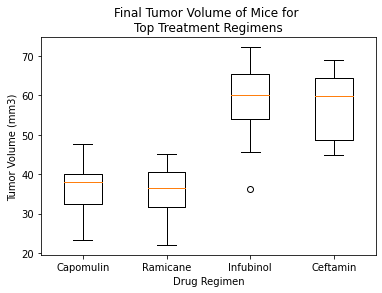

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_box = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice for \nTop Treatment Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
ax1.boxplot(drug_box)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, "Tumor Volume for 's185'- Capomulin")

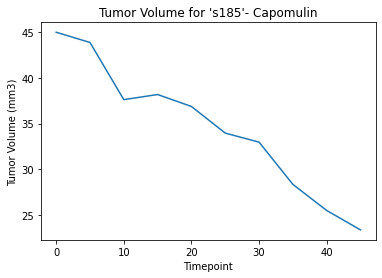

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185 = new_merge_df.loc[new_merge_df["Mouse ID"] == "s185",:]

x_axis = s185["Timepoint"]
y_axis = s185["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.plot(x_axis, y_axis)
ax1.set_xlabel("Timepoint")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Tumor Volume for 's185'- Capomulin")


<function matplotlib.pyplot.show(*args, **kw)>

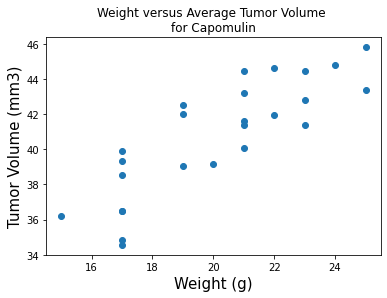

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Capomulin",:]

tumor_group = tumor.groupby("Mouse ID")
tumor_mean = tumor_group.mean()

weight = tumor_mean["Weight (g)"]
avg_tumor = tumor_mean["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
ax.scatter(weight, avg_tumor)

ax.set_xlabel("Weight (g)", fontsize=15)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=15)
ax.set_title('Weight versus Average Tumor Volume \nfor Capomulin')
plt.show

## Correlation and Regression

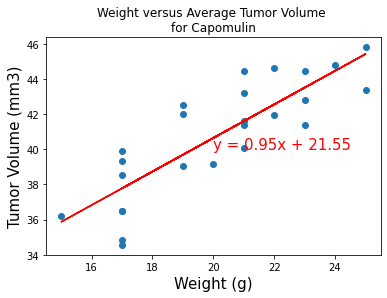

In [74]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats

weight = tumor_mean["Weight (g)"]
avg_tumor = tumor_mean["Tumor Volume (mm3)"]

(slope, intercept, r_value, p_value, std_err) = stats.linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots()
ax.scatter(weight, avg_tumor)

ax.set_xlabel("Weight (g)", fontsize=15)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=15)
ax.set_title('Weight versus Average Tumor Volume \nfor Capomulin')

plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.show()



In [81]:
#Calculate the correlation coefficient 

weight = tumor_mean["Weight (g)"]
avg_tumor = tumor_mean["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
